In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv('data/mouse_drug_data.csv')
clinical_trial_data = pd.read_csv('data/clinicaltrial_data.csv')

#This will allow me to see the summary between Mouse data and Clinical Data that way I can see similarities
#and create a single dataset
#mouse_drug_data.info()
#clinical_trial_data.info()

# Combine the data into a single dataset @ Mouse ID
mouse_clinical_combined = pd.merge(clinical_trial_data, mouse_drug_data, on ="Mouse ID",how='left')

# Display the data table for preview
mouse_clinical_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = mouse_clinical_combined.loc[:,["Timepoint", "Drug", "Tumor Volume (mm3)"]]

tumor_response_df = tumor_response.groupby(["Drug", "Timepoint"]).mean().reset_index()

tumor_response_df.head(6)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
ste_of_tumor_response = tumor_response.groupby(['Drug','Timepoint']).sem().reset_index()
ste_of_tumor_response.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_pivot = tumor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
ste_tumor_volume_df_pivot=ste_of_tumor_response.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


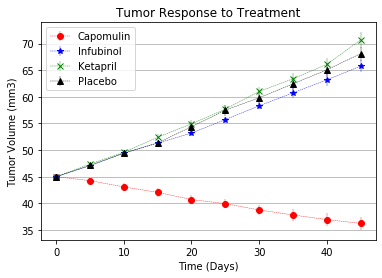

In [183]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()

#These are my variables needed for the plot
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','*','x','^']
colors=['red','blue','green','black']

#Prepping my points
mtv_graph=mean_tumor_volume_df_pivot
stv_graph=ste_tumor_volume_df_pivot

mtv_timepoint=mtv_graph.index

i=0
for drug in drug_list:
    ax.errorbar(mtv_timepoint, mtv_graph[drug], stv_graph[drug], marker=markers[i],color=colors[i], ls = '--', linewidth=0.4)
    i+=1

#Plotting 
plt.legend(drug_list)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
ax.yaxis.grid()

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png', format='png')

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [43]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
tumor_response_ms = mouse_clinical_combined.loc[:,["Timepoint", "Drug", "Metastatic Sites"]]

tumor_response_ms_df = tumor_response_ms.groupby(["Drug", "Timepoint"]).mean().reset_index()

tumor_response_ms_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [73]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ste_of_ms_response = tumor_response_ms.groupby(['Drug','Timepoint']).sem().reset_index()
ste_of_ms_response_df = pd.DataFrame(ste_of_ms_response)
ste_of_ms_response_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [56]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_ms_df_pivot = tumor_response_ms_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
ste_tumor_volume_ms_df_pivot = ste_of_ms_response.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_tumor_volume_ms_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


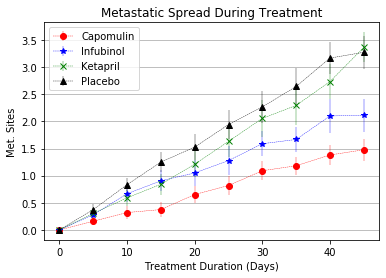

In [184]:
# Generate the Plot (with Error Bars)

fig, ax=plt.subplots()

drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','*','x','^']
colors=['red','blue','green','black']

i = 0
for drug in drug_list:  
    ste = ste_tumor_volume_ms_df_pivot[drug]
    met_treatment_plt = plt.errorbar(mean_tumor_volume_ms_df_pivot.index, mean_tumor_volume_ms_df_pivot[drug],ste,
                        marker=markers[i], color=colors[i],ls = '--', linewidth=0.4)  
    i+=1
    
#Plotting
plt.legend(drug_list)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
ax.yaxis.grid()

# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment.png', format='png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [103]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = mouse_clinical_combined.groupby(['Drug','Timepoint'])['Mouse ID']
count_mouse_df = mouse_grouped_df.nunique()
count_mouse_df = pd.DataFrame(count_mouse_df)

# Convert to DataFrame
count_mouse_df.reset_index(inplace=True)
count_mouse_df=count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [104]:
# Minor Data Munging to Re-Format the Data Frames
count_mouse_df_pivot = count_mouse_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
count_mouse_df_pivot.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


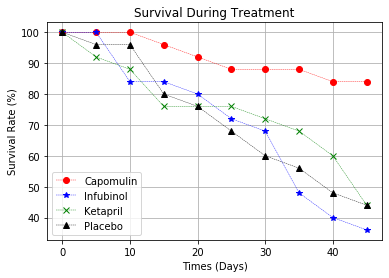

In [185]:
# Generate the Plot (Accounting for percentages)

fig, ax=plt.subplots()

drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','*','x','^']
colors=['red','blue','green','black']

i=0
for drug in drug_list:
    total_mouse = count_mouse_df_pivot[drug][0]
    survival_rate = (count_mouse_df_pivot[drug]/total_mouse) * 100
    survival_treatment_plt = plt.plot(count_mouse_df_pivot.index, survival_rate,marker=markers[i], color=colors[i], ls = '--',linewidth=0.4)
    i+=1
    
# Show the Figure
plt.legend(drug_list)
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig('Survival_During_Treatment.png', format='png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [110]:
# Calculate the percent changes for each drug
percentage_change_for_each_drug = (mean_tumor_volume_df_pivot.iloc[-1]/(mean_tumor_volume_df_pivot.iloc[0])-1)*100

# Display the data to confirm
percentage_change_for_each_drug

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

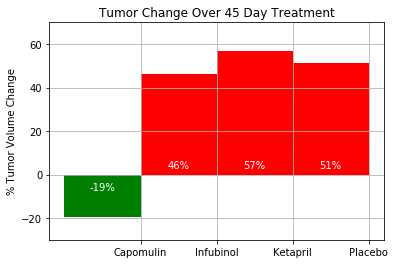

In [189]:
# Store all Relevant Percent Changes into a Tuple

ax = plt.subplot()
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']    

graph_perc_changes = percentage_change_for_each_drug < 0

change_drug_list = [(percentage_change_for_each_drug[drug]) for drug in drug_list]
change_drug_plt = plt.bar(drug_list,change_drug_list,width=-1,align='edge',color=graph_perc_changes.map({True:'g',False:'r'}))
 
    
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

#Use functions to label the percentages of changes
autolabel(change_drug_plt)

# Save the Figure
plt.savefig('Tumor_Change_over_45_Day_Treatment.png', format='png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)